# SO MANY TS DIAGRAMS

the adventures of whether or not they'll be an obvious way to discern my water masses

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.interpolate import interpn
import scipy.interpolate as interp
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from scipy.stats import binned_statistic_2d

In [2]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [35]:
def get_data(mydata, starttime, endtime):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.init_temp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    depth = depthf(mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    return salt, temp, depth

def get_allll_data(mydata, starttime, endtime):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.init_temp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    depth = depthf(mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    lon = mydata.init_lon[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    trans = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)
    return salt, temp, depth, lon, trans

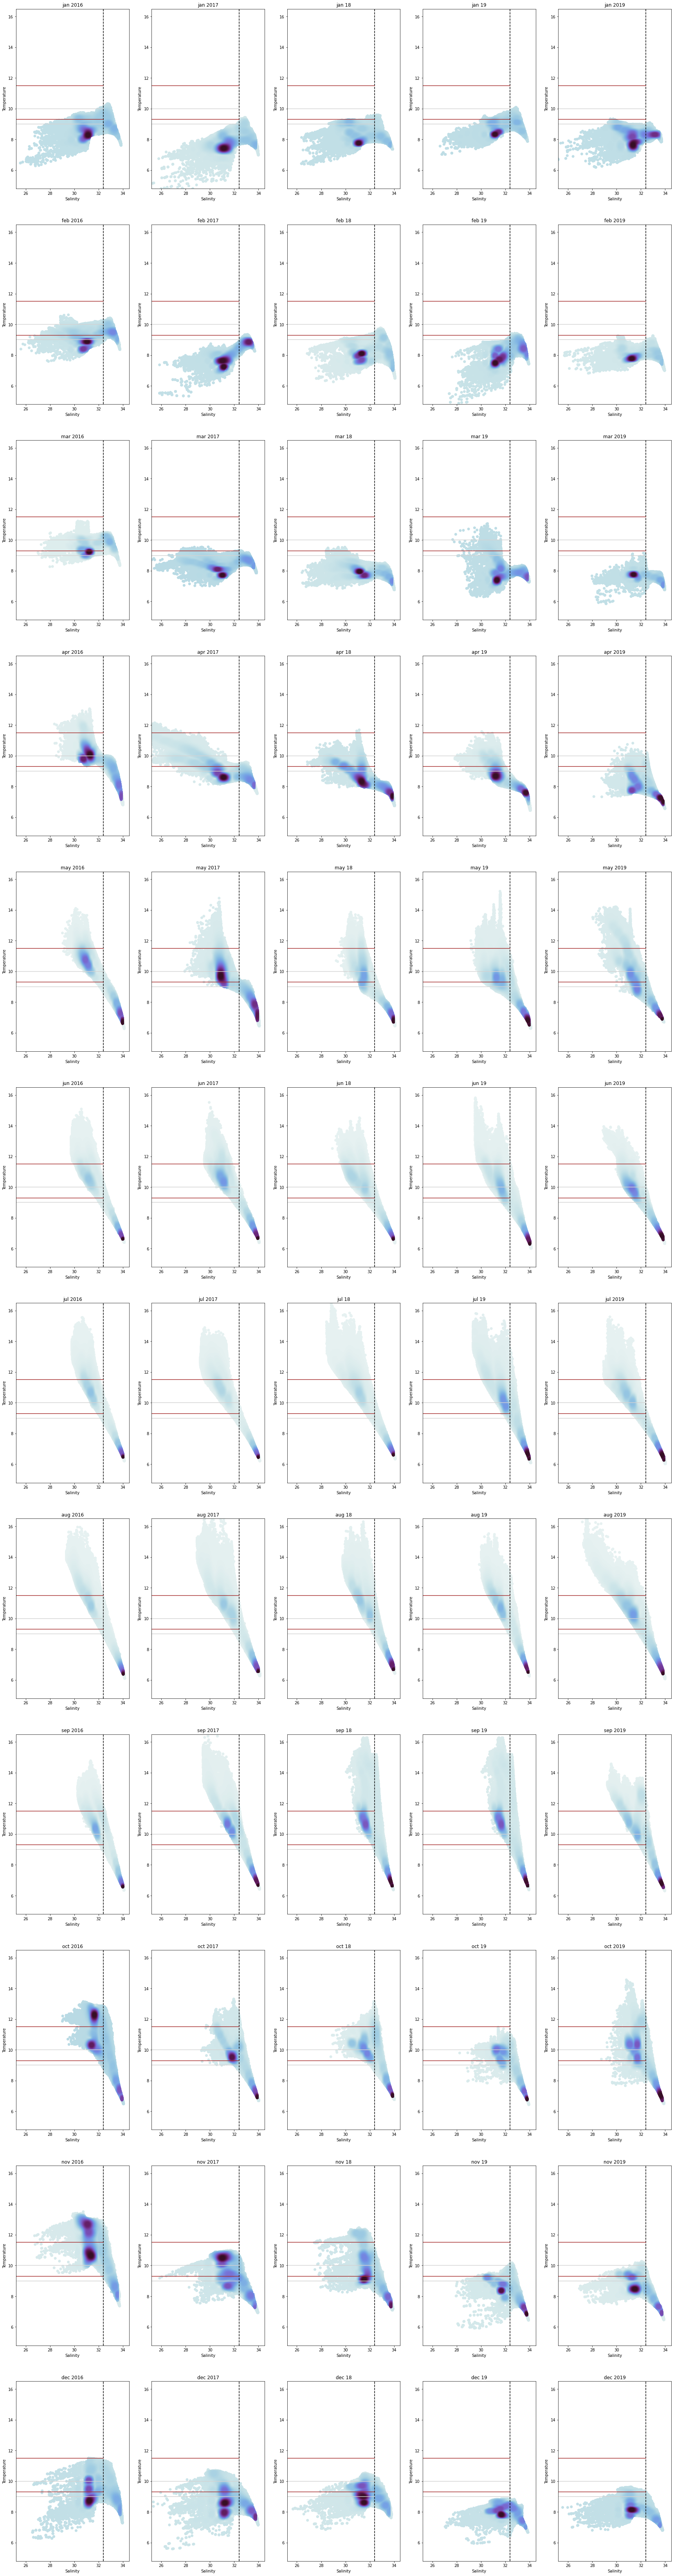

In [10]:
fig, ax = plt.subplots(12,5, figsize=(30,120))

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
starttime = 1
endtime = 720

#2016 and 2017
year = [16,17]

l = -1
for num in year:
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan'+str(num)+'/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    k=0
    l+=1
    for i in range(12):
        salt, temp, _ = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        #would like to get the denisty of points
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        salt, temp, z = salt[idx], temp[idx], z[idx]
                    
        ax[k,l].scatter(salt,temp, c=z, cmap=cm.cm.dense)
        ax[k,l].plot([32.4, 32.4], [4.8,16.5], 'k--')
        ax[k,l].plot([25.2, 32.4], [11.5,11.5], color='brown')
        ax[k,l].plot([25.2, 32.4], [9.3,9.3], color='brown')
        ax[k,l].plot([25.2, 32.4], [10,10], color='lightgrey')
        ax[k,l].plot([25.2, 32.4], [9,9], color='lightgrey')
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

#2019 and 2018 (both done month by month)
year = [18,19]
l=1
k=0
for num in year:
    l+=1
    k=0
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        
        salt = mydata.init_salt
        temp = mydata.init_temp
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0
        idx = z.argsort()
        salt, temp, z = salt[idx], temp[idx], z[idx]
        
        ax[k,l].scatter(salt,temp, c=z, cmap=cm.cm.dense)
        ax[k,l].plot([32.4, 32.4], [4.8,16.5], 'k--')
        ax[k,l].plot([25.2, 32.4], [11.5,11.5], color='brown')
        ax[k,l].plot([25.2, 32.4], [9.3,9.3], color='brown')
        ax[k,l].plot([25.2, 32.4], [10,10], color='lightgrey')
        ax[k,l].plot([25.2, 32.4], [9,9], color='lightgrey')
        title = str_mo[i] + " " + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1
            

#2020
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan20/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

l=4
k=0
for i in range(12):
        salt, temp, _ = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        idx = z.argsort()
        salt, temp, z = salt[idx], temp[idx], z[idx]
                    
        ax[k,l].scatter(salt,temp, c=z, cmap=cm.cm.dense)
        ax[k,l].plot([32.4, 32.4], [4.8,16.5], 'k--')
        ax[k,l].plot([25.2, 32.4], [11.5,11.5], color='brown')
        ax[k,l].plot([25.2, 32.4], [9.3,9.3], color='brown')
        ax[k,l].plot([25.2, 32.4], [10,10], color='lightgrey')
        ax[k,l].plot([25.2, 32.4], [9,9], color='lightgrey')
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

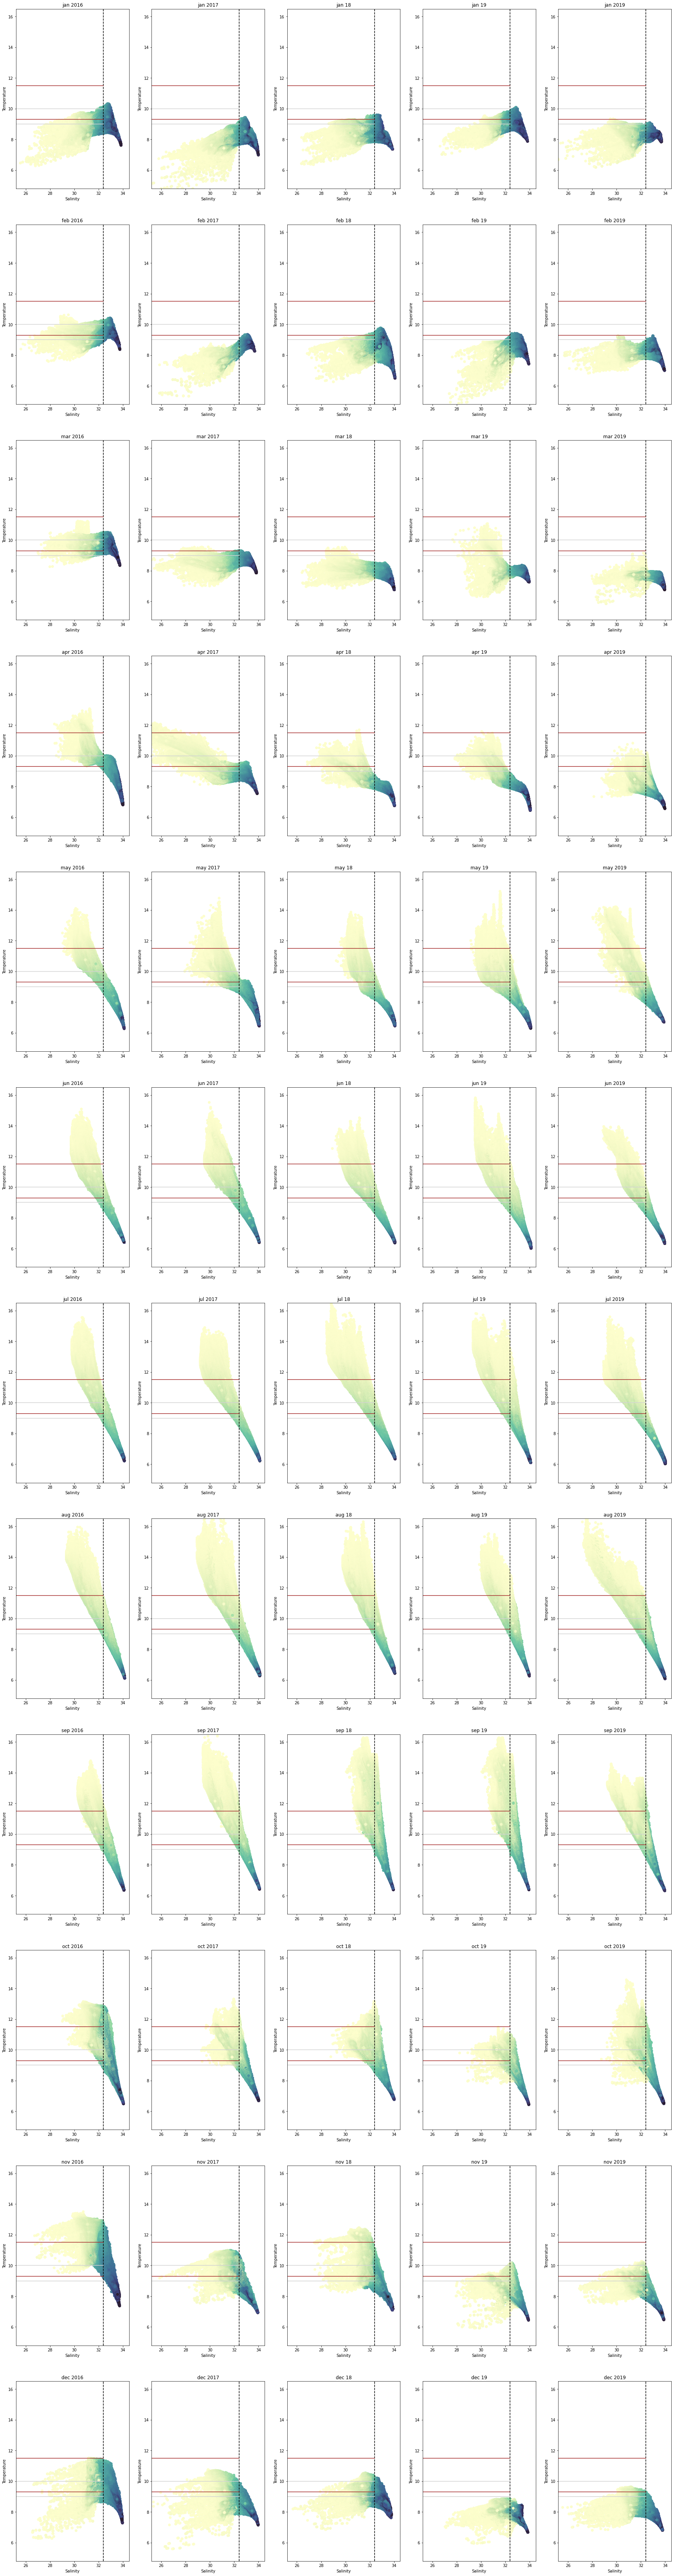

In [11]:
fig, ax = plt.subplots(12,5, figsize=(30,120))

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
starttime = 1
endtime = 720

#2016 and 2017
year = [16,17]

l = -1
for num in year:
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan'+str(num)+'/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    k=0
    l+=1
    for i in range(12):
        salt, temp, depth = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        #would like to get the denisty of points
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        salt, temp, depth = salt[idx], temp[idx], depth[idx]
                    
        ax[k,l].scatter(salt,temp, c=depth, cmap=cm.cm.deep)
        ax[k,l].plot([32.4, 32.4], [4.8,16.5], 'k--')
        ax[k,l].plot([25.2, 32.4], [11.5,11.5], color='brown')
        ax[k,l].plot([25.2, 32.4], [9.3,9.3], color='brown')
        ax[k,l].plot([25.2, 32.4], [10,10], color='lightgrey')
        ax[k,l].plot([25.2, 32.4], [9,9], color='lightgrey')
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

#2019 and 2018 (both done month by month)
year = [18,19]
l=1
k=0
for num in year:
    l+=1
    k=0
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        
        salt = mydata.init_salt
        temp = mydata.init_temp
        depth = depthf(mydata.init_z-1.)[0]
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0
        idx = z.argsort()
        salt, temp, depth = salt[idx], temp[idx], depth[idx]
        
        ax[k,l].scatter(salt,temp, c=depth, cmap=cm.cm.deep)
        ax[k,l].plot([32.4, 32.4], [4.8,16.5], 'k--')
        ax[k,l].plot([25.2, 32.4], [11.5,11.5], color='brown')
        ax[k,l].plot([25.2, 32.4], [9.3,9.3], color='brown')
        ax[k,l].plot([25.2, 32.4], [10,10], color='lightgrey')
        ax[k,l].plot([25.2, 32.4], [9,9], color='lightgrey')
        title = str_mo[i] + " " + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1
            

#2020
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan20/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

l=4
k=0
for i in range(12):
        salt, temp, depth = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        idx = z.argsort()
        salt, temp, depth = salt[idx], temp[idx], depth[idx]
                    
        ax[k,l].scatter(salt,temp, c=depth, cmap=cm.cm.deep)
        ax[k,l].plot([32.4, 32.4], [4.8,16.5], 'k--')
        ax[k,l].plot([25.2, 32.4], [11.5,11.5], color='brown')
        ax[k,l].plot([25.2, 32.4], [9.3,9.3], color='brown')
        ax[k,l].plot([25.2, 32.4], [10,10], color='lightgrey')
        ax[k,l].plot([25.2, 32.4], [9,9], color='lightgrey')
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

In [6]:
def draw_patches(fmask, lonW, lonE, t_dist, t_depths): #draw ground part of cross section
    topo = []
    for i in range(lonW,lonE):
        for j in range(len(t_depths)-1):
            if fmask[j, i] == 0:
                rect = Rectangle((t_dist[i], t_depths[j]), t_dist[i+1]-t_dist[i], t_depths[j+1]-t_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', zorder=3)
    return(pc)

In [50]:
def Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax, lons, trans, depths, tracer, Tmax, Tmin):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata.init_t[-1]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    bins = [np.array(t_dist[lonW-1:lonE+1]), t_depths]
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    t_max = (0.25/np.sum(trans)).values

    dist = lons/m2lon
        
    H1, _, _ = np.histogram2d(dist, depth, bins=bins,weights= trans, density= True)
    _, xedges, yedges = np.histogram2d(dist, depth, bins = bins)
            
    H_final = H1.T
    H_final = np.where(H_final>0, H_final, H_final*np.nan)
    
    h= H_final
    h[:,11] = H_final[:,11]/2.6
    h[:,19] = H_final[:,19]/2.5
    h[:,28] = H_final[:,28]/2
    h[:,36] = H_final[:,36]/2
    H_final = h
    H_final = np.where(H_final>0, H_final, H_final*np.nan)

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.cm.speed
    cmap.set_bad('white')
    im = ax.pcolormesh(X, Y, H_final, vmax = t_max, vmin = 0, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    tick = np.round(((t_max*sum(trans)).values),2)
    cb1.set_ticks([0, t_max])
    cb1.set_ticklabels([0, tick]) 
    # cb1.set_label(units, labelpad=-20)
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)
    
    H = binned_statistic_2d(dist, depths, tracer, statistic=np.mean, bins=bins)   
    _, xedges, yedges = np.histogram2d(dist, depths, bins = bins)
    h = H.statistic.T
    X, Y = np.meshgrid(xedges, yedges)
    CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)
    ax.clabel(CS, inline=1, fontsize=7)
    
    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW], t_dist[lonE], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW], t_lons[lonE], 5),2))
    ax.set_xlim((t_dist[lonW], t_dist[lonE-1]))
    ax.set_ylim((maxdepth, 0))
    ax.set_ylabel('Depth [m]')
    mydata.close()

In [51]:
lonW = 18
lonE = 63
figrid = 377
maxdepth = 300

<ipython-input-50-bc3a333d7208>:50: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)
<ipython-input-50-bc3a333d7208>:50: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)
<ipython-input-50-bc3a333d7208>:50: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)


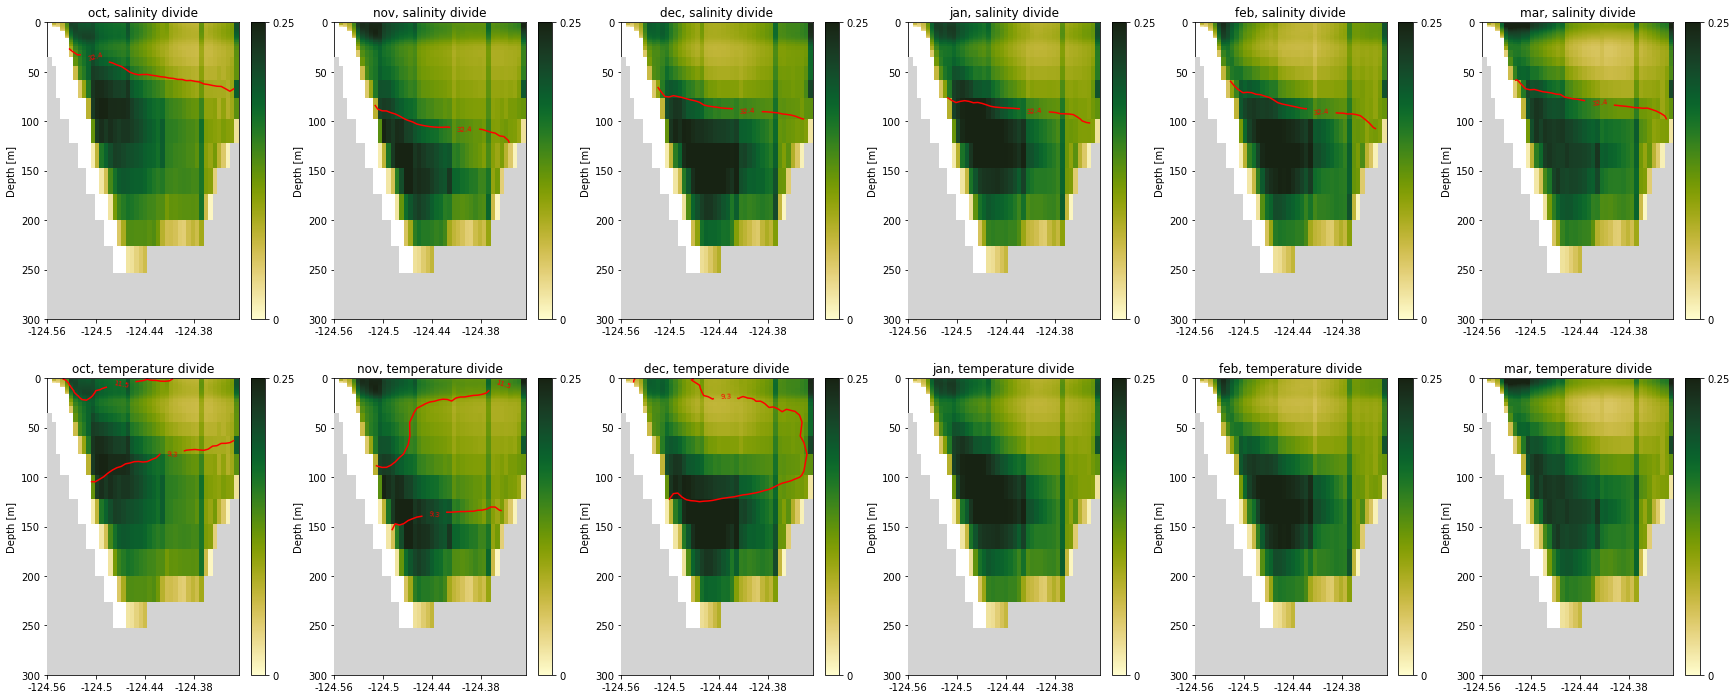

In [52]:
fig, ax = plt.subplots(2,6, figsize=(30,12))

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo1 = ['oct', 'nov', 'dec']
str_mo2 = ['jan', 'feb', 'mar']
starttime = 1
endtime = 720

salt_div = 32.4
temp_low = 9.3
temp_high = 11.5

#2016 oct, nov, dec
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan16/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
k=0
for i in [9,10,11]:
    salt, temp, depth, lon, trans = get_allll_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
    
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[0,k], lon, trans, depth, salt, salt_div, 0)
    title = str_mo1[k]+", salinity divide"
    ax[0,k].set_title(title)
    
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[1,k], lon, trans, depth, temp, temp_high, temp_low)
    title = str_mo1[k]+", temperature divide"
    ax[1,k].set_title(title)
    
    k+=1


#2017 jan, feb, mar
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
for i in [0,1,2]:
    salt, temp, depth, lon, trans = get_allll_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[0,k], lon, trans, depth, salt, salt_div, 0)
    title = str_mo2[i]+", salinity divide"
    ax[0,k].set_title(title)
    
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[1,k], lon, trans, depth, temp, temp_high, temp_low)
    title = str_mo2[i]+", temperature divide"
    ax[1,k].set_title(title)
    
    k+=1

<ipython-input-50-bc3a333d7208>:50: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)
<ipython-input-50-bc3a333d7208>:50: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)
<ipython-input-50-bc3a333d7208>:50: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X[:-1,:-1],Y[:-1,:-1], h, [Tmin,Tmax], colors='r', zorder = 2)


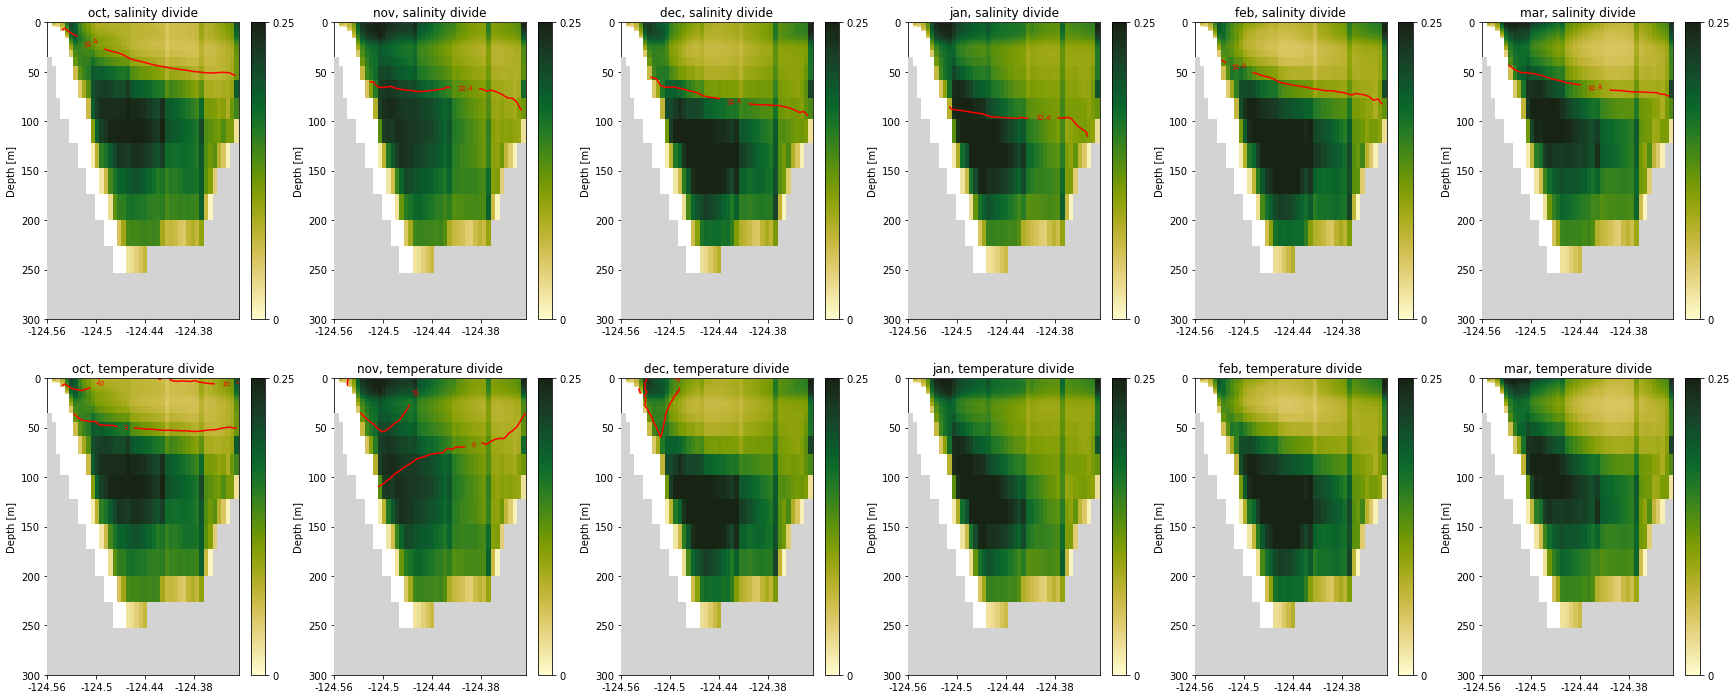

In [53]:
fig, ax = plt.subplots(2,6, figsize=(30,12))

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo1 = ['oct', 'nov', 'dec']
str_mo2 = ['jan', 'feb', 'mar']
starttime = 1
endtime = 720

salt_div = 32.4
temp_low = 9
temp_high = 10

#2017 oct, nov, dec
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
k=0
for i in [9,10,11]:
    salt, temp, depth, lon, trans = get_allll_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
    
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[0,k], lon, trans, depth, salt, salt_div, 0)
    title = str_mo1[k]+", salinity divide"
    ax[0,k].set_title(title)
    
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[1,k], lon, trans, depth, temp, temp_high, temp_low)
    title = str_mo1[k]+", temperature divide"
    ax[1,k].set_title(title)
    
    k+=1


#2018 jan, feb, mar (done month by month)
for i in [0,1,2]:
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo2[i]+'18/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    time=720
        
    salt = mydata.init_salt
    temp = mydata.init_temp
    depth = depthf(mydata.init_z-1.)[0]
    lon = mydata.init_lon
    trans = mydata.init_transp/time
        
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[0,k], lon, trans, depth, salt, salt_div, 0)
    title = str_mo2[i]+", salinity divide"
    ax[0,k].set_title(title)
    
    Flux_WMcontours(lonW, lonE, figrid, maxdepth, ax[1,k], lon, trans, depth, temp, temp_high, temp_low)
    title = str_mo2[i]+", temperature divide"
    ax[1,k].set_title(title)
    
    k+=1